In [1]:
%pylab inline
import pandas as pd
import math

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_table('./AuAu250AMeV10_100/AuAu250AMev0.06mom.dat', sep="\t")
df2 = pd.read_table('./AuAu400AMeV10_100/AuAu400AMev0.06mom.dat', sep="\t")
df3 = pd.read_table('./AuAu150AMeV10_100/AuAu150AMev0.06mom.dat', sep="\t")

energy = np.asarray(df[['       E']])
atomicmass = np.asarray(df[['A']])
charge = np.asarray(df[['Z']])
angle = np.asarray(df[['polar angle']])

charge2 = np.asarray(df2[['Z']])
angle2 = np.asarray(df2[['polar angle']])

charge3 = np.asarray(df3[['Z']])
angle3 = np.asarray(df3[['polar angle']])

chargeAngleBetweenZeroAndThrithyDeg = np.asarray(df[['Z', 'polar angle']])
chargeAngleBetweenZeroAndThrithyDeg2 = np.asarray(df2[['Z', 'polar angle']])
chargeAngleBetweenZeroAndThrithyDeg3 = np.asarray(df3[['Z', 'polar angle']])

chargeAngleBetweenZeroAndThrithyDeg = np.asarray(
    list(filter(lambda x: x[1] < 90. and x[1] > 0., chargeAngleBetweenZeroAndThrithyDeg)))

chargeAngleBetweenZeroAndThrithyDeg2 = np.asarray(
    list(filter(lambda x: x[1] < 90. and x[1] > 0., chargeAngleBetweenZeroAndThrithyDeg2)))

chargeAngleBetweenZeroAndThrithyDeg3 = np.asarray(
    list(filter(lambda x: x[1] < 90. and x[1] > 0., chargeAngleBetweenZeroAndThrithyDeg3)))

angles = {}
multiplicity = {}

angles2 = {}
multiplicity2 = {}

angles3 = {}
multiplicity3 = {}

for elem in chargeAngleBetweenZeroAndThrithyDeg:
    angles[elem[0]] = []
    multiplicity[elem[0]] = 0

for elem in chargeAngleBetweenZeroAndThrithyDeg2:
    angles2[elem[0]] = []
    multiplicity2[elem[0]] = 0

for elem in chargeAngleBetweenZeroAndThrithyDeg3:
    angles3[elem[0]] = []
    multiplicity3[elem[0]] = 0
       
for elem in chargeAngleBetweenZeroAndThrithyDeg:
    angles[elem[0]].append(elem[1])
    multiplicity[elem[0]] += 1
        
for elem in chargeAngleBetweenZeroAndThrithyDeg2:
    angles2[elem[0]].append(elem[1])
    multiplicity2[elem[0]] += 1

for elem in chargeAngleBetweenZeroAndThrithyDeg3:
    angles3[elem[0]].append(elem[1])
    multiplicity3[elem[0]] += 1
    
#meanAngles = {}
#varAngles = {}

#for chrge in list(angles.keys()):
#    meanAngles[chrge] = np.mean(angles[chrge])
#    varAngles[chrge] = np.sqrt(np.var(angles[chrge]))

#plt.errorbar(np.array(list(angles.keys())),
#            np.array(list(meanAngles.values())),
#            np.array(list(varAngles.values())),
#            marker='s', mfc='red',
#            mec='green', ms=5, mew=2, lw=1, linestyle='None')

#plt.xlim(0,15)
#plt.ylim(0,50)

#xlabel('Z')
#ylabel('Polárszög [$^{\circ}$]')

#plt.show()

[1.08071606e+04 5.44891013e-01] [1.60372089e+03 2.72513821e-02]
[1.71268793e+04 9.75717406e-01] [2.82288554e+03 3.17929395e-02]
[5.13088712e+03 3.57570290e-01] [1.88546306e+03 6.80153970e-02]


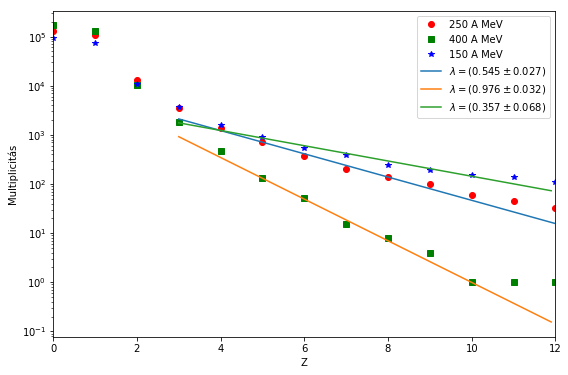

In [3]:
plt.figure(figsize(9,6))

plt.plot(np.array(list(angles.keys())), np.array(list(multiplicity.values())), 'ro')
plt.plot(np.array(list(angles2.keys())), np.array(list(multiplicity2.values())), 'gs')
plt.plot(np.array(list(angles3.keys())), np.array(list(multiplicity3.values())), 'b*')
plt.xlim(0,12)

xlabel('Z')
ylabel('Multiplicitás')


#energies = {}

#atomicmass = atomicmass.reshape(len(charge),)

#for i in range(0, len(atomicmass)):
#    energies[atomicmass[i]] = []

#for i in range(0,len(atomicmass)):
#    value = float(energy[i])
#    energies[atomicmass[i]].append(value)
    
#meanergies = []
#sigmergies = []
    
#for val in energies:
#    meanergies.append(np.mean(energies[val]))
#    sigmergies.append(np.sqrt(np.var(energies[val])))


#plt.plot(list(energies.keys()), meanergies, 'ro')
#plt.errorbar(list(energies.keys()),
#            meanergies,
#            sigmergies,
#            marker='s', mfc='red',
#         mec='green', ms=5, mew=2, lw=1, linestyle='None')
#plt.xlim(0,15)
#plt.ylim(0,3)

#xlabel('A')
#ylabel('Mozgási energia [GeV/c]')

#plt.show()

def exponential_fit(x, N, lamb):
    return N*np.exp(-lamb*x)

from scipy.optimize import curve_fit

popt1, pcov1 = curve_fit(exponential_fit,
                         np.array(list(angles.keys()))[7:15],
                         np.array(list(multiplicity.values()))[7:15], p0=[10**6, 1.1])
perr1 = sqrt(diag(pcov1))

print(popt1, perr1)

plt.plot(np.arange(3,15, step=0.1), exponential_fit(np.arange(3,15, step=0.1),*popt1))

popt2, pcov2 = curve_fit(exponential_fit,
                         np.array(list(angles2.keys()))[5:12],
                         np.array(list(multiplicity2.values()))[5:12], p0=[10**6, 1.1])
perr2 = sqrt(diag(pcov2))

print(popt2, perr2)

plt.plot(np.arange(3,12, step=0.1), exponential_fit(np.arange(3,12, step=0.1),*popt2))

popt3, pcov3 = curve_fit(exponential_fit,
                         np.array(list(angles3.keys()))[6:12],
                         np.array(list(multiplicity3.values()))[6:12], p0=[10**6, 1.1])
perr3 = sqrt(diag(pcov3))

print(popt3, perr3)

plt.plot(np.arange(3,12, step=0.1), exponential_fit(np.arange(3,12, step=0.1),*popt3))

plt.legend(('250 A MeV', '400 A MeV', '150 A MeV', '$\lambda = (0.545 \pm 0.027)$',
           '$\lambda = (0.976 \pm 0.032)$', '$\lambda = (0.357 \pm 0.068)$'),
           loc='upper right')

plt.yscale('log')

savefig('./p006_250_400_fit.png')

[0.06902118 0.10169766] [0.00117416 0.01303534]


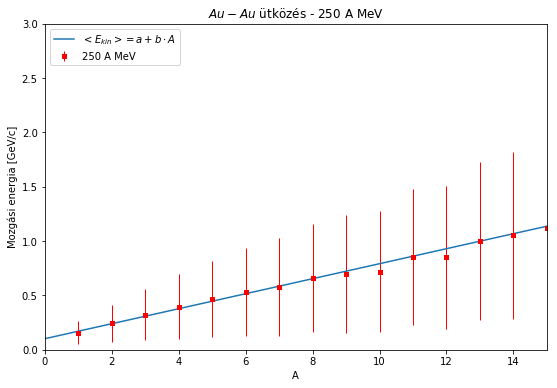

In [4]:
df = pd.read_table('./AuAu250AMeV10_100/AuAu250AMev0.06mom.dat', sep="\t")
df2 = pd.read_table('./AuAu400AMeV10_100/AuAu400AMev0.06mom.dat', sep="\t")
df3 = pd.read_table('./AuAu150AMeV10_100/AuAu150AMev0.06mom.dat', sep="\t")

chargeAndAngleAndEnergy = np.asarray(df[['Z', 'polar angle','       E','A']])

chargeAndAngleAndEnergy = np.asarray(
    list(filter(lambda x: x[1] < 180. and x[1] > 0., chargeAndAngleAndEnergy)))

massEnergy = {}
MeanEnergy = {}
DevEnergy = {}

for elem in chargeAndAngleAndEnergy:
    massEnergy[elem[3]] = [] 

for elem in chargeAndAngleAndEnergy:
    massEnergy[elem[3]].append(elem[2])
        
for elem in massEnergy:
    mean = np.mean(massEnergy[elem])
    dev = np.sqrt(np.var(massEnergy[elem]))
    if not math.isnan(dev):
        MeanEnergy[elem] = mean
        DevEnergy[elem] = dev
    else:
        ZoneMeanEnergy[elem] = mean
        ZoneDevEnergy[elem] = 0

def egyenes(x, m, b):
    return m*x + b

popt, pcov = curve_fit(egyenes, list(massEnergy.keys())[0:12], list(MeanEnergy.values())[0:12],
                      p0 = [0.1666, 0.1])
perr = sqrt(diag(pcov))

plt.errorbar(list(massEnergy.keys()),
            list(MeanEnergy.values()),
            list(DevEnergy.values()),
            marker='s', mfc='red',
         mec='red', ms=3, mew=2, lw=1, linestyle='None', ecolor='red')
plt.plot(np.linspace(0,15, 100), egyenes(np.linspace(0,15,100), *popt))
xlabel('A')
ylabel('Mozgási energia [GeV/c]')
plt.legend(('$<E_{kin}> = a + b\cdot A$','250 A MeV'),
           loc='upper left')
xlim(0,15)
ylim(0,3)
title('$Au-Au$ ütközés - 250 A MeV')
savefig('./250AMeV0.06mom2000adat.png')

print(popt, perr)

[0.10253549 0.06625285] [0.00887086 0.07678124]


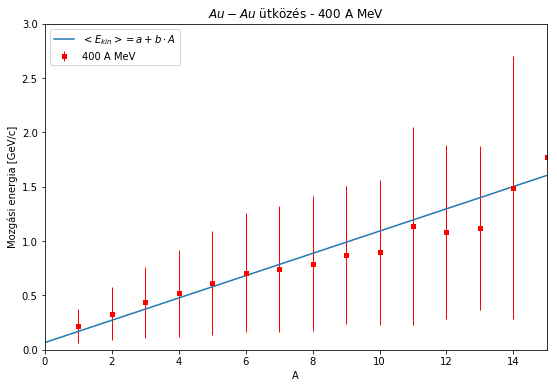

In [5]:

chargeAndAngleAndEnergy = np.asarray(df2[['Z', 'polar angle','       E','A']])

chargeAndAngleAndEnergy = np.asarray(
    list(filter(lambda x: x[1] < 180. and x[1] > 0., chargeAndAngleAndEnergy)))

massEnergy = {}
MeanEnergy = {}
DevEnergy = {}

for elem in chargeAndAngleAndEnergy:
    massEnergy[elem[3]] = [] 

for elem in chargeAndAngleAndEnergy:
    massEnergy[elem[3]].append(elem[2])
        
for elem in massEnergy:
    mean = np.mean(massEnergy[elem])
    dev = np.sqrt(np.var(massEnergy[elem]))
    if not math.isnan(dev):
        MeanEnergy[elem] = mean
        DevEnergy[elem] = dev
    else:
        ZoneMeanEnergy[elem] = mean
        ZoneDevEnergy[elem] = 0

def egyenes(x, m, b):
    return m*x + b

popt, pcov = curve_fit(egyenes, list(massEnergy.keys())[0:12], list(MeanEnergy.values())[0:12],
                      p0 = [0.1666, 0.1])
perr = sqrt(diag(pcov))

plt.errorbar(list(massEnergy.keys()),
            list(MeanEnergy.values()),
            list(DevEnergy.values()),
            marker='s', mfc='red',
         mec='red', ms=3, mew=2, lw=1, linestyle='None', ecolor='red')
plt.plot(np.linspace(0,15, 100), egyenes(np.linspace(0,15,100), *popt))
xlabel('A')
ylabel('Mozgási energia [GeV/c]')
plt.legend(('$<E_{kin}> = a + b\cdot A$','400 A MeV'),
           loc='upper left')
xlim(0,15)
ylim(0,3)
title('$Au-Au$ ütközés - 400 A MeV')
savefig('./400AMeV0.06mom2000adat.png')

print(popt, perr)

[0.05368001 0.09423601] [0.0022456  0.01901037]


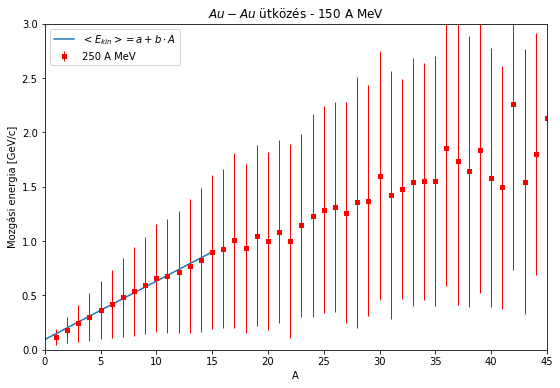

In [19]:

chargeAndAngleAndEnergy = np.asarray(df3[['Z', 'polar angle','       E','A']])

chargeAndAngleAndEnergy = np.asarray(
    list(filter(lambda x: x[1] < 180. and x[1] > 0., chargeAndAngleAndEnergy)))

massEnergy = {}
MeanEnergy = {}
DevEnergy = {}

for elem in chargeAndAngleAndEnergy:
    massEnergy[elem[3]] = [] 

for elem in chargeAndAngleAndEnergy:
    massEnergy[elem[3]].append(elem[2])
        
for elem in massEnergy:
    mean = np.mean(massEnergy[elem])
    dev = np.sqrt(np.var(massEnergy[elem]))
    if not math.isnan(dev):
        MeanEnergy[elem] = mean
        DevEnergy[elem] = dev
    else:
        ZoneMeanEnergy[elem] = mean
        ZoneDevEnergy[elem] = 0

def egyenes(x, m, b):
    return m*x + b

popt, pcov = curve_fit(egyenes, list(massEnergy.keys())[4:10], list(MeanEnergy.values())[4:10],
                      p0 = [0.1666, 0.1])
perr = sqrt(diag(pcov))

plt.errorbar(list(massEnergy.keys()),
            list(MeanEnergy.values()),
            list(DevEnergy.values()),
            marker='s', mfc='red',
         mec='red', ms=3, mew=2, lw=1, linestyle='None', ecolor='red')
plt.plot(np.linspace(0,15, 100), egyenes(np.linspace(0,15,100), *popt))
xlabel('A')
ylabel('Mozgási energia [GeV/c]')
plt.legend(('$<E_{kin}> = a + b\cdot A$','250 A MeV'),
           loc='upper left')
xlim(0,45)
ylim(0,3)
title('$Au-Au$ ütközés - 150 A MeV')
savefig('./150AMeV0.06mom2000adat.png')

print(popt, perr)

In [7]:
chargeAndAngleAndEnergy = np.asarray(df3[['Z', 'polar angle','       E','A']])

chargeAndAngleAndEnergy = np.asarray(
    list(filter(lambda x: x[1] < 90. and x[1] > 60. and (x[0] == 1 or x[0] == 2) and x[3] < 5, chargeAndAngleAndEnergy)))

Zone = {}
Ztwo = {}
ZoneMeanEnergy = {}
ZtwoMeanEnergy = {}
ZoneDevEnergy = {}
ZtwoDevEnergy = {}

for elem in chargeAndAngleAndEnergy:
    Zone[int(elem[3])] = []
    Ztwo[int(elem[3])] = []

for elem in chargeAndAngleAndEnergy:
    if elem[0] == 1:
        Zone[int(elem[3])].append(elem[2])
    else:
        Ztwo[int(elem[3])].append(elem[2])
        
for elem in Zone:
    mean = np.mean(Zone[elem])
    dev = np.sqrt(np.var(Zone[elem]))
    if not math.isnan(dev):
        ZoneMeanEnergy[elem] = mean
        ZoneDevEnergy[elem] = dev
    else:
        ZoneMeanEnergy[elem] = mean
        ZoneDevEnergy[elem] = 0

for elem in Ztwo:
    mean = np.mean(Ztwo[elem])
    dev = np.sqrt(np.var(Ztwo[elem]))
    if not math.isnan(dev):
        ZtwoMeanEnergy[elem] = mean
        ZtwoDevEnergy[elem] = dev
    else:
        ZtwoMeanEnergy[elem] = mean
        ZtwoDevEnergy[elem] = 0
        
print(ZoneMeanEnergy, ZoneDevEnergy)
print(ZoneDevEnergy, ZtwoDevEnergy)

{1: 0.11592005424464784, 2: 0.17947579443614745, 3: 0.2446363215367647, 4: 0.2982597388347826} {1: 0.07396583574746597, 2: 0.11958584854627267, 3: 0.17029955772528368, 4: 0.2230009150355941}
{1: 0.07396583574746597, 2: 0.11958584854627267, 3: 0.17029955772528368, 4: 0.2230009150355941} {1: 0, 2: 0.11320693138775755, 3: 0.1630055724538492, 4: 0.22083825674774374}


/home/dumbo/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/dumbo/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/dumbo/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/dumbo/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/dumbo/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


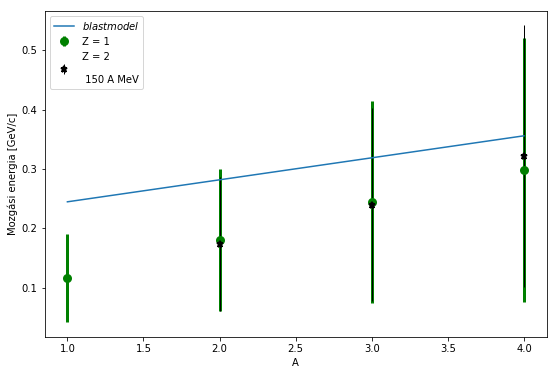

In [8]:
plt.figure(figsize(9,6))

plt.errorbar(list(ZoneMeanEnergy.keys()),
            list(ZoneMeanEnergy.values()),
            list(ZoneDevEnergy.values()),
            marker='o', mfc='green',
         mec='green', ms=7, mew=2, lw=3, linestyle='None', ecolor='green', label = 'Z = 1')
plt.errorbar(list(ZtwoMeanEnergy.keys()),
            list(ZtwoMeanEnergy.values()),
            list(ZtwoDevEnergy.values()),
            marker='*', mfc='black',
         mec='black', ms=7, mew=2, lw=1, linestyle='None', ecolor='black', label = 'Z = 2')

plt.plot(np.linspace(1,4, 100), egyenes(np.linspace(1,4,100), *popt))
xlabel('A')
ylabel('Mozgási energia [GeV/c]')
plt.legend(('$blast model$','Z = 1', 'Z = 2 \n\n 150 A MeV'),
           loc='upper left')
savefig('./konnyu_magok_150AMeV.png')

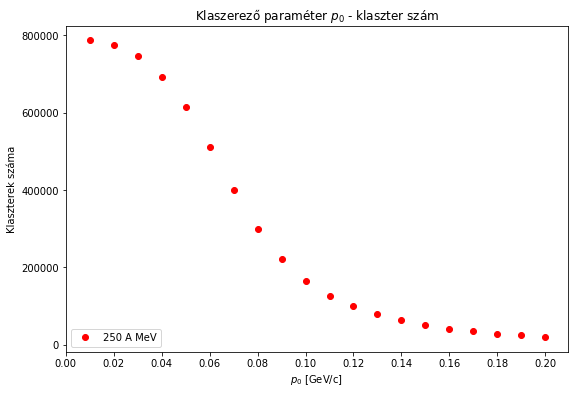

In [9]:
# klaszterek száma
pNullClusters = loadtxt('./p0clusters.dat')

p0 = []
noOfClusters = []

for elem in pNullClusters:
    p0.append(elem[0])
    noOfClusters.append(elem[1])

plt.plot(p0, noOfClusters, 'ro')
#plt.yscale('log')

ylabel('Klaszterek száma')
xlabel('$p_{0}$ [GeV/c]')

plt.xticks(np.arange(0,0.22, step=0.02))
plt.yticks(np.arange(0,900000, step=200000))

title('Klaszerező paraméter $p_{0}$ - klaszter szám')

plt.legend(('250 A MeV', ''),
           loc='lower left')

derivate = []

for i in range(0, len(p0) - 1):
    derivate.append((noOfClusters[i+1] - noOfClusters[i] )/(p0[i+1] - p0[i]))

savefig('./klaszterszamparameter.png')

0.06


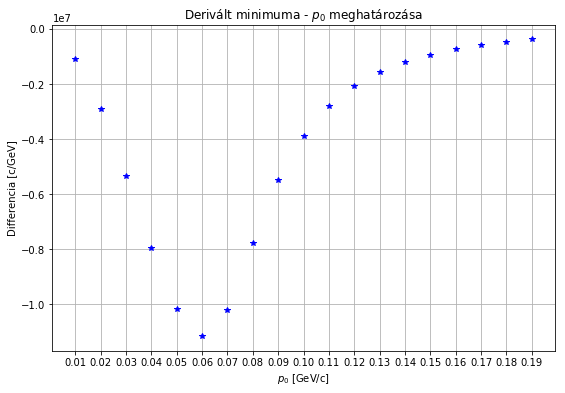

In [10]:
plt.figure(figsize(9,6))
plt.plot(p0[0:len(p0)-1], derivate, 'b*')
plt.xticks(np.arange(0.01, 0.2, step=0.01))

print(p0[derivate.index(np.min(derivate))])

xlabel('$p_{0}$ [GeV/c]')
ylabel('Differencia [c/GeV]')

title('Derivált minimuma - $p_{0}$ meghatározása')

grid(True)

savefig('./legjobb_p0.png')

In [11]:
multiplicities = [{},{},{},{},{},
                  {},{},{},{},{},
                  {},{},{},{},{},
                  {},{},{},{},{},
                  {},{},{},{},{}]

N = 7

for i in range(3, N + 3):
    
    df = pd.read_table('./AuAu250AMeV10_100/AuAu250AMev0.0'+str(i)+'mom.dat', sep="\t")
    
    energy = np.asarray(df[['       E']])
    atomicmass = np.asarray(df[['A']])
    charge = np.asarray(df[['Z']])
    angle = np.asarray(df[['polar angle']])
    
    for elem in charge:
        multiplicities[i - 3][elem[0]] = 0
    
    for elem in charge:
        multiplicities[i - 3][elem[0]] += 1

charges = set(multiplicities[0].keys())
ChargeAndMeanMultiplicity = {}
ChargeAndDevMultiplicities = {}

for i in range(1, N):
    
    charges = set.intersection(charges, set(multiplicities[i].keys()))

allMultiplicities = {}

for charge in charges:
    allMultiplicities[charge] = []
    for i in range(0,N):
        allMultiplicities[charge].append(multiplicities[i][charge])
        
for val in charges:
    ChargeAndMeanMultiplicity[val] = np.mean(allMultiplicities[val])
    dev = np.sqrt(
        np.var(allMultiplicities[val]))
    ChargeAndDevMultiplicities[val] = dev

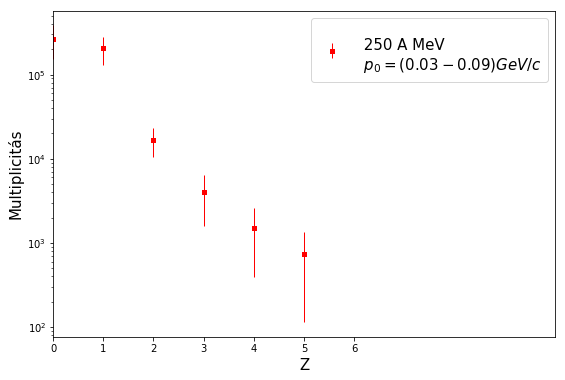

In [12]:
plt.figure(figsize(9,6))

plt.errorbar(list(ChargeAndMeanMultiplicity.keys()),
            list(ChargeAndMeanMultiplicity.values()),
            list(ChargeAndDevMultiplicities.values()),
            marker='s', mfc='red',
         mec='red', ms=3, mew=2, lw=1, linestyle='None', ecolor='red')
plt.yscale('log')
xlim(0,10)

plt.xticks(np.arange(0,7 , step=1))

xlabel('Z', fontsize=15)
ylabel('Multiplicitás', fontsize=15)

plt.legend(('\n 250 A MeV \n $p_{0} = (0.03 - 0.09) GeV/c$', ''),
           loc='upper right', fontsize=15)

savefig('./p0valtozik_klaszterek.png')

In [13]:
# random változtatva adat
multiplicities = [{},{},{},{},{},
                  {},{},{},{},{},
                  {},{},{},{},{},
                  {},{},{},{},{},
                  {},{},{},{},{}]

N = 7

for i in range(1, N):
    
    df = pd.read_table('./randomValtoztatvaAdat/Alex_time60fmc_centralAuAu_10_20_400AMeV0.06mom'+str(i)+'.dat', sep="\t")
    
    energy = np.asarray(df[['       E']])
    atomicmass = np.asarray(df[['A']])
    charge = np.asarray(df[['Z']])
    angle = np.asarray(df[['polar angle']])
    
    for elem in charge:
        multiplicities[i - 1][elem[0]] = 0
    
    for elem in charge:
        multiplicities[i - 1][elem[0]] += 1

charges = set(multiplicities[0].keys())
ChargeAndMeanMultiplicity = {}
ChargeAndDevMultiplicities = {}

for i in range(1, N - 1):
    
    charges = set.intersection(charges, set(multiplicities[i].keys()))
    
allMultiplicities = {}

for charge in charges:
    allMultiplicities[charge] = []
    for i in range(0,N - 1):
        allMultiplicities[charge].append(multiplicities[i][charge])
        
for val in charges:
    ChargeAndMeanMultiplicity[val] = np.mean(allMultiplicities[val])
    dev = np.sqrt(
        np.var(allMultiplicities[val]))
    ChargeAndDevMultiplicities[val] = dev

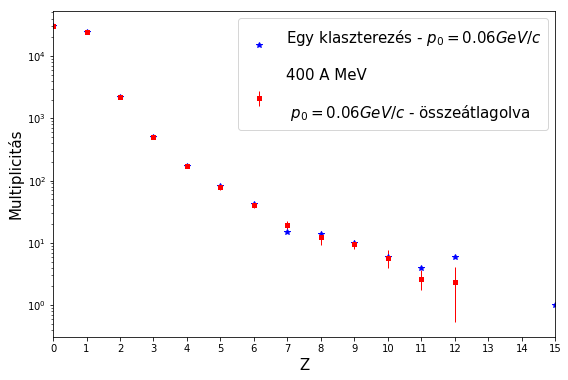

In [14]:
plt.figure(figsize(9,6))

plt.plot(list(multiplicities[0].keys()), list(multiplicities[0].values()), 'b*')

plt.errorbar(list(ChargeAndMeanMultiplicity.keys()),
            list(ChargeAndMeanMultiplicity.values()),
            list(ChargeAndDevMultiplicities.values()),
            marker='s', mfc='red',
         mec='red', ms=3, mew=2, lw=1, linestyle='None', ecolor='red')
plt.yscale('log')
xlim(0,15)

plt.xticks(np.arange(0,16 , step=1))

xlabel('Z', fontsize=15)
ylabel('Multiplicitás', fontsize=15)

plt.legend(('Egy klaszterezés - $p_{0} = 0.06 GeV/c$ \n', '400 A MeV \n\n $p_{0} = 0.06 GeV/c$ - összeátlagolva'),
           loc='upper right', fontsize=15)

savefig('./p0allando_kulonbozoRandom.png')